In [1]:
import sys
sys.path.append('/datascience/home/ssaha/')

import numpy as np

import time
import sys
import warnings
import datetime
import gc
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import os
import seaborn as sns
from pathlib import Path
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn 
import os

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, log_loss, recall_score, roc_curve, roc_auc_score, confusion_matrix,classification_report 
from sklearn.metrics import  adjusted_mutual_info_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score

import pickle

import data_prep 
import data_summary
import lime_ModelExplainer
import data_split
import reading_data
import eda
from lime_ModelExplainer import lime_explainer
%matplotlib inline

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.
/datascience/home/ssaha/RMModel/Python/data_summary.py:15: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/root/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File 

In [5]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.model.regression import H2ORegressionModel
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
from __future__ import print_function
import pandas as pd
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,9 months and 22 days !!!
H2O cluster name:,H2O_from_python_ssaha_8vky9w
H2O cluster total nodes:,1
H2O cluster free memory:,26.62 Gb
H2O cluster total cores:,72
H2O cluster allowed cores:,72
H2O cluster status:,"locked, healthy"


In [6]:
import os
import data_prep

In [7]:
project_identifier = "c360_customeradt_in_market_lexus"
parent_dir         = "/datascience/home/ssaha/"

parent_dir_project = os.path.join(parent_dir,'RMModel/') 
mlresult_dir       = os.path.join(parent_dir_project,'mlresults/')
mlobjects          =os.path.join(parent_dir_project,'mlobjects/')

data_dir           = os.path.join(parent_dir_project,'data/')
input_dir          = os.path.join(parent_dir_project,'input/')

In [8]:
df_2017= reading_data.read_data(path="/datascience/home/ssaha/input/c360_customeradt_in_market_lexus_082017/")


In [13]:
y_2017 = df_2017["dep_purchase_lexus_new_luv_6mo"]

In [14]:
gc.collect()

0

In [15]:
X=df_2017.drop('dep_purchase_lexus_new_luv_6mo', axis=1)

In [ ]:
rus, id_rus, X_rus, y_rus= data_prep.random_undersample(X, y_2017)

### Keeping columns similar to training set

In [62]:
cols= ['active_brand',
 'association_type',
 'last_sales_dealer_markettype',
 'marital_status',
 'marital_status_confidence',
 'i1_education_confidence',
 'home_ownership',
 'presence_of_children',
 'creditcard_cd',
 'gndr_cd',
 'interest_in_fitness_cd',
 'interest_in_outdoors_cd',
 'interest_in_sports_cd',
 'interest_in_golf_cd',
 'tennis_cd',
 'interest_in_skiing_cd',
 'interest_in_cultural_arts_cd',
 'cruise_enthusiasts_cd',
 'interest_in_music_cd',
 'musical_class_opera_big_bnd_cd',
 'music_country_cd',
 'music_christian_cd',
 'music_oldies_cd',
 'music_rock_cd',
 'photography_cd',
 'interest_in_travel_cd',
 'dwelling_type',
 'aged_parent_in_hh',
 'home_business_ind',
 'i1_business_owner_flg',
 'presence_of_automobile_cd',
 'healthy_living_cd',
 'investors_cd',
 'invest_in_mutual_fund_annts_cd',
 'last_serviced_dealer_markettype',
 'pma_toy_scion_dealership_markettype',
 'pma_lexus_dealership_markettype',
 'owned_lexus_sedan_ind',
 'owned_lexus_LUV_ind',
 'owned_lexus_new_luv_ind',
 'owned_lexus_cpo_luv_ind',
 'owned_lexus_new_sedan_ind',
 'owned_lexus_cpo_sedan_ind',
 'owned_lexus_ind',
 'owned_corolla_ind',
 'owned_rav4_ind',
 'owned_prius_ind',
 'owned_suv_ind',
 'owned_hybrid_ind',
 'owned_big_engine_vehicle_ind',
 'owned_4wd_vehicle_ind',
 'multiple_vehicle_type_ind',
 'owned_prius_no',
 'owned_is250_ind',
 'owned_is350_ind',
 'owned_is_ind',
 'owned_es_ind',
 'owned_rx_ind',
 'owned_ls_ind',
 'owned_gs_ind',
 'owned_highlander_ind',
 'owned_hs250h_ind',
 'owned_ct200h_ind',
 'owned_white_vehicle_ind',
 'owned_black_vehicle_ind',
 'owned_silver_gray_vehicle_ind',
 'owned_gold_brown_orange_vehicle_ind',
 'owned_yellow_vehicle_ind',
 'owned_green_vehicle_ind',
 'owned_aqua_vehicle_ind',
 'owned_blue_vehicle_ind',
 'owned_purple_vehicle_ind',
 'owned_brown_vehicle_ind',
 'owned_gold_vehicle_ind',
 'owned_red_vehicle_ind',
 'owned_orange_vehicle_ind',
 'owned_other_color_vehicle_ind',
 'owned_gray_vehicle_ind',
 'owned_vehicle_my_1981_90_ind',
 'owned_vehicle_my_1991_00_ind',
 'owned_vehicle_my_2001_10_ind',
 'owned_vehicle_my_2011_20_ind',
 'purchased_vehicle_last_2years_ind',
 'purchased_lexus_sedan_last_2years_ind',
 'purchased_lexus_sedan_last_3years_ind',
 'purchased_lexus_LUV_last_2years_ind',
 'purchased_lexus_LUV_last_3years_ind',
 'purchased_lexus_last_3years_ind',
 'purchased_rav4_last_3years_ind',
 'purchased_is_last_3years_ind',
 'current_owned_lexus_sedan_ind',
 'current_owned_lexus_LUV_ind',
 'current_owned_lexus_new_luv_ind',
 'current_owned_lexus_new_sedan_ind',
 'current_owned_lexus_cpo_luv_ind',
 'current_owned_lexus_cpo_sedan_ind',
 'current_owned_lexus_ind',
 'current_owned_corolla_ind',
 'current_owned_rav4_ind',
 'current_owned_prius_ind',
 'current_owned_is_ind',
 'current_owned_es_ind',
 'current_owned_rx_ind',
 'current_owned_ls_ind',
 'current_owned_gs_ind',
 'current_owned_highlander_ind',
 'past_owned_lexus_sedan_ind',
 'past_owned_lexus_LUV_ind',
 'past_owned_lexus_new_luv_ind',
 'past_owned_lexus_new_sedan_ind',
 'past_owned_lexus_cpo_luv_ind',
 'past_owned_lexus_cpo_sedan_ind',
 'past_owned_lexus_ind',
 'past_owned_rav4_ind',
 'past_owned_is_ind',
 'past_owned_es_ind',
 'past_owned_rx_ind',
 'past_owned_ls_ind',
 'past_owned_gs_ind',
 'purchased_vehicle_new_ind',
 'purchased_vehicle_used_ind',
 'purchased_vehicle_cpo_ind',
 'purchased_vehicle_lexus_ind',
 'purchased_vehicle_suv_ind',
 'purchased_vehicle_hybrid_ind',
 'purchased_vehicle_big_engine_ind',
 'purchased_vehicle_4wd_ind',
 'purchased_vehicle_lexus_sedan_ind',
 'purchased_vehicle_lexus_LUV_ind',
 'purchased_vehicle_corolla_ind',
 'purchased_vehicle_rav4_ind',
 'purchased_vehicle_prius_ind',
 'first_purchase_ind',
 'first_purchase_lexus_sedan_ind',
 'first_purchase_lexus_LUV_ind',
 'first_purchase_lexus_ind',
 'first_purchase_hybrid_ind',
 'first_purchase_prius_ind',
 'first_purchase_big_engine_ind',
 'first_purchase_suv_ind',
 'dofu_year1_ind',
 'dofu_year2_ind',
 'dofu_year3_ind',
 'dofu_year4_ind',
 'dofu_year5above_ind',
 'tc_active_ind',
 'first_purchase_luxury_vehicle_ind',
 'owned_corolla_no',
 'owned_toyota_compact_ind',
 'owned_toyota_compactsuv_ind',
 'owned_toyota_fullsizesuv_ind',
 'owned_toyota_hybrid_ind',
 'owned_toyota_midsizesuv_ind',
 'owned_toyota_sportscar_ind',
 'owned_toyota_subcompact_ind',
 'past_owned_toyota_compactsuv_ind',
 'current_owned_toyota_compact_ind',
 'current_owned_toyota_compactsuv_ind',
 'current_owned_toyota_fullsizesuv_ind',
 'current_owned_toyota_hybrid_ind',
 'current_owned_toyota_midsizesuv_ind',
 'current_owned_toyota_sportscar_ind',
 'current_owned_toyota_subcompact_ind',
 'past_owned_toyota_4wd_ind',
 'past_owned_toyota_suv_ind',
 'driver_ind',
 'sales_survey_ind',
 'service_survey_ind',
 'has_uss',
 'multiple_case_type_ind',
 'has_cec',
 'lhr_incomplete_lead_ind',
 'lhr_sweepstakes_1_permission_ind',
 'current_lead',
 'current_handraiser',
 'current_participator',
 'ever_lead_ind',
 'ever_handraiser_ind',
 'ever_participator_ind',
 'has_emd',
 'communication_received_ind',
 'campaign_received_ind',
 'offer_received_ind',
 'communication_opened_ind',
 'communication_clicked_ind',
 'campaign_opened_ind',
 'campaign_clicked_ind',
 'brochure_requested_ind',
 'active_offer_ind',
 'dealer_loyalist',
 'no_ro_visit_during_tc',
 'no_ro_visits_post_0_2_tc',
 'no_ro_visits_post_2_4_tc',
 'ever_customer_payment_ind',
 'ever_warranty_payment_ind',
 'ever_service_ind',
 'ever_service_hybrid_ind',
 'ever_service_lexus_sedan_ind',
 'ever_service_lexus_LUV_ind',
 'customer_high_payment_ind',
 'warranty_high_payment_ind',
 'high_service_ind',
 'high_ro_time_ind',
 'current_vehicle_serviced_ind',
 'current_vehicle_customer_full_payment_ind',
 'current_vehicle_high_service_ind',
 'current_vehicle_high_ro_time_ind',
 'has_nsh',
 'pma_lexus_dealership_region',
 'customer_language_english_ind',
 'customer_language_spanish_ind',
 'no_sales_dealer_assoc',
 'days_since_last_purchase_vehicle',
 'avg_zip3_vehicle_val',
 'owned_hybrid_no',
 'first_purchase_vehicle_msrp',
 'second_last_purchase_age',
 'days_since_first_purchase_vehicle',
 'no_leased_vehicle',
 'last_sales_dealer_region',
 'i1_education',
 'avg_no_vehicles_per_hh',
 'max_value_vehicles_per_hh',
 'no_of_chldrn_cd',
 'no_of_adlts_per_hh_cd',
 'i1_occupation_grp_val',
 'length_of_residence',
 'avg_custpay_recent_vehicle',
 'last_reported_mileage_recent_vehicle',
 'no_ro_visits_48_60mo',
 'avg_cust_pay_48_60mo',
 'avg_cust_pay_36_48mo',
 'avg_cust_pay_24_36mo',
 'avg_ro_time_18_24mo',
 'no_ro_visits_12_18mo',
 'avg_ro_time_12_18mo',
 'no_ro_visits_6_12mo',
 'avg_ro_time_6_12mo',
 'no_ro_visits_0_6mo',
 'avg_ro_time_0_6mo',
 'no_servicing_dealer',
 'noros_high_cust_pay_18_24mo',
 'noros_high_cust_pay_12_18mo',
 'noros_high_cust_pay_6_12mo',
 'noros_high_cust_pay_0_6mo',
 'noros_high_ro_time_18_24mo',
 'noros_high_ro_time_12_18mo',
 'noros_high_ro_time_6_12mo',
 'noros_high_ro_time_0_6mo',
 'avg_mileage_permonth_recent_vehicle',
 'est_current_mileage',
 'avg_service_assoc_length',
 'last_serviced_dealer_no',
 'last_serviced_dealer_region',
 'pma_toy_scion_dealership_cd',
 'pma_toy_scion_dealership_region',
 'pma_lexus_dealership_cd']

In [80]:
X_2017_app= pd.DataFrame()
col_not_found=[]
for col in cols:
    if col in df_2017.columns:
        X_2017_app[col]=df_2017[col].copy()
    else:
        col_not_found.append(col)

In [82]:
X_2017_app.shape

(5070955, 257)

In [83]:
col_not_found

[]

In [85]:
from sklearn.preprocessing import Imputer

In [86]:
def missing(df):    
    categorical_list = df.select_dtypes(include="O").columns.tolist()
    numerical_list = df.select_dtypes(exclude="O").columns.tolist()
    '''
    print('Number of categorical features:', str(len(categorical_list)))
    print('Number of numerical features:', str(len(numerical_list)))'''
    for cat_col in categorical_list:
        if df[cat_col].isnull().sum()>0:
            #print("Categorical column "+ str(cat_col) + " is getting imputed by most frequent value- " +str(df[cat_col].value_counts().index[0]))
            df[cat_col].fillna(df[cat_col].value_counts().index[0], inplace=True)

    fill_NaN = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imputed_df = pd.DataFrame(fill_NaN.fit_transform(df[numerical_list]))
    imputed_df.columns = numerical_list
    result= pd.concat([df[categorical_list].reset_index(drop=True), imputed_df.reset_index(drop=True)], axis=1)
    return result

In [87]:
X= X_2017_app.copy()

In [88]:
X_imputed= missing(X)

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [89]:
X_imputed.shape

(5070955, 257)

In [90]:
X_outlier_treated= data_prep.outlier_treatment_dataframe(X_imputed)

/root/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7772: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




 Time taken to execute the function is 480.34844040870667



In [ ]:
X_outlier_treated.dtypes

In [95]:
gc.collect()

341

In [96]:
X_encoded= data_prep.label_encode(X_outlier_treated)

Number of categorical features: 37

 Time taken to execute the function is 46.58539652824402



In [97]:
X_encoded_abs=X_encoded.abs()

In [98]:
X_norm= data_prep.standarization(X_encoded_abs)

Number of categorical features: 0
Number of numerical features: 257

 Time taken to execute the function is 84.55540108680725



In [99]:
X_h5_2017= X_norm.to_hdf(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ '_X_2017.h5', key= 'df')
y_h5_2017= y_2017.to_hdf(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ '_y_2017.h5', key= 'df')

In [101]:
X_h5= pd.read_hdf(mlresult_dir + 'c360_customeradt_in_market_lexus_25_X_2017.h5')

In [104]:
X_h5.shape

(5070955, 257)

In [102]:
y_h5= pd.read_hdf(mlresult_dir + 'c360_customeradt_in_market_lexus_25_y_2017.h5')

In [107]:
y_h5.shape

(5070955,)

In [108]:
test= pd.concat([X_h5.reset_index(drop=True), y_h5.reset_index(drop=True)], axis=1)

In [109]:
test.shape

(5070955, 258)

In [110]:
test.head()

,active_brand,association_type,last_sales_dealer_markettype,marital_status,marital_status_confidence,i1_education_confidence,home_ownership,presence_of_children,creditcard_cd,gndr_cd,...,noros_high_ro_time_0_6mo,avg_mileage_permonth_recent_vehicle,est_current_mileage,avg_service_assoc_length,last_serviced_dealer_no,last_serviced_dealer_region,pma_toy_scion_dealership_cd,pma_toy_scion_dealership_region,pma_lexus_dealership_cd,dep_purchase_lexus_new_luv_6mo
0,-0.622455,-0.600296,1.866616,-0.659082,-0.364961,-1.487035,-0.210103,-0.190859,0.463681,0.676845,...,-6.412111e-01,-0.051872,-0.153909,-1.306075e+00,3.816403e-01,5.830639e-02,-0.727694,0.760767,0.307273,0
1,-0.622455,-0.600296,-0.093857,1.723322,-1.722904,0.600903,-0.210103,1.759789,0.463681,0.676845,...,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,0.694600,-0.682256,0.417435,0
2,-0.622455,-0.600296,-0.093857,-0.659082,0.992982,0.600903,-0.210103,-0.190859,0.463681,0.676845,...,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,5.157756,-1.361325,2.267375,0
3,-0.622455,-0.600296,-0.093857,-0.659082,0.992982,0.600903,-0.210103,-0.190859,0.463681,-1.095187,...,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,5.157756,-1.361325,2.267375,0
4,-0.622455,-0.600296,-0.093857,-0.659082,0.992982,0.600903,-0.210103,-0.190859,0.463681,-1.095187,...,1.951197e-16,-0.001436,-0.000946,7.770049e-16,5.348864e-15,-1.824737e-15,5.157756,-1.361325,2.267375,0


In [111]:
sample= test.sample(frac= 0.001)

In [113]:
y_h5.head()

0    0
1    0
2    0
3    0
4    0
Name: dep_purchase_lexus_new_luv_6mo, dtype: int32

In [114]:
sample_X= sample.drop('dep_purchase_lexus_new_luv_6mo', axis= 1, inplace=False)

In [115]:
sample_y= sample['dep_purchase_lexus_new_luv_6mo']

In [112]:
DecisionTree_pkl_filename = os.path.join(mlobjects+'DecisionTree_.pkl')
dt_model_pkl = open(DecisionTree_pkl_filename, 'rb')
dt = pickle.load(dt_model_pkl)
print ("Loaded Decision tree model :: ", dt)

Loaded Decision tree model ::  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [145]:
y_pred_dt= dt.predict(X_h5)

In [146]:
gc.collect()

4574

In [147]:
acc =accuracy_score(y_pred= y_pred_dt, y_true=y_h5) * 100
print('accuracy ', acc)

accuracy  60.97186821811671


In [148]:
#f1_score
f1=f1_score(y_pred= y_pred_dt, y_true=y_h5, average='macro')  * 100
print('f1_score ' + str(f1))

f1_score 39.22637813975103


In [150]:
#precision_score
prec=precision_score(y_pred= y_pred_dt, y_true=y_h5, average='weighted')* 100
print('precision_score ', prec)

precision_score  98.64797933761447


In [151]:
#recall_score
recall=recall_score(y_pred= y_pred_dt, y_true=y_h5)*100
print('recall_score ' , recall)

recall_score  65.86935487500281


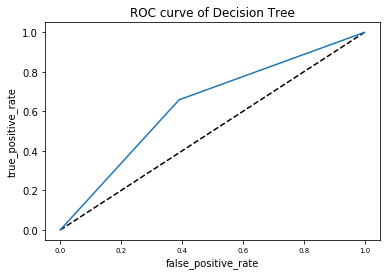

In [152]:
#roc_curve
y_pred_proba_dt = dt.predict_proba(X_h5)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_h5, y_score=y_pred_proba_dt)
plt.plot([0,1],[0,1],'k--')
plt.plot(false_positive_rate,true_positive_rate, label='Decision Tree')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('ROC curve of Decision Tree' )
plt.show()

In [153]:
#roc_auc_score
roc= roc_auc_score(y_h5, y_pred_proba_dt) * 100
print('roc_auc_score ' + str(roc))

roc_auc_score 63.3989614323336


In [154]:
#confusion_matrix
print('confusion_matrix ', confusion_matrix(y_h5, y_pred_dt))

confusion_matrix  [[3062583 1963931]
 [  15168   29273]]


In [133]:
pd.crosstab(sample_y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
class_report= classification_report(sample_y,y_pred)
print("classification_report"+ str(class_report))

classification_report              precision    recall  f1-score   support

           0       0.99      0.60      0.75      5006
           1       0.02      0.63      0.04        65

   micro avg       0.60      0.60      0.60      5071
   macro avg       0.51      0.61      0.39      5071
weighted avg       0.98      0.60      0.74      5071



In [156]:
for name, importance in zip(X_h5.columns, dt.feature_importances_):
    print(name, importance)

active_brand 0.004639223766507647
association_type 0.0003122857622719425
last_sales_dealer_markettype 0.0012588973856929846
marital_status 0.0016576618464561406
marital_status_confidence 0.0032848514935332174
i1_education_confidence 0.0017880212603426661
home_ownership 0.005621999928558216
presence_of_children 0.005255347679832398
creditcard_cd 0.0021517614578474677
gndr_cd 0.0037776449211794644
interest_in_fitness_cd 0.0013946062854326713
interest_in_outdoors_cd 0.0014422848207493394
interest_in_sports_cd 0.0015194730794767966
interest_in_golf_cd 0.0007756377528518741
tennis_cd 0.0005490662092954018
interest_in_skiing_cd 0.0012255220836191643
interest_in_cultural_arts_cd 0.001321696667343216
cruise_enthusiasts_cd 0.0007853994663319172
interest_in_music_cd 0.0006276615924246866
musical_class_opera_big_bnd_cd 0.0003939265146743859
music_country_cd 0.0008577470024525326
music_christian_cd 0.0007724345167342192
music_oldies_cd 0.00035550198043277987
music_rock_cd 0.0009854860850981465
pho

### Random Forest

In [162]:
rf_pkl_filename = os.path.join(mlobjects+'rf.pkl')
rf_pkl = open(rf_pkl_filename, 'rb')
rf = pickle.load(rf_pkl)
print ("Loaded RF tree model :: ", rf)

Loaded RF tree model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [165]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, rf.predict(X_h5)))

confusion_matrix  [[4196582  829932]
 [  19312   25129]]


In [166]:
#roc_auc_score
y_pred_proba_rf = rf.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_rf) * 100
print('roc_auc_score ' + str(roc))

roc_auc_score 78.71725563999871


In [167]:
for name, importance in zip(X_h5.columns, rf.feature_importances_):
    print(name, importance)

active_brand 0.0016118708448338626
association_type 0.0015416332996434534
last_sales_dealer_markettype 0.0004038589074716195
marital_status 0.0010558012734255668
marital_status_confidence 0.0016433128056787744
i1_education_confidence 0.0006414553483208116
home_ownership 0.0006286121877979504
presence_of_children 0.0015581689887299486
creditcard_cd 0.00030060906943900773
gndr_cd 0.0013993679302158391
interest_in_fitness_cd 0.0004324670912969634
interest_in_outdoors_cd 0.00039937595282466416
interest_in_sports_cd 0.0008055395801777951
interest_in_golf_cd 0.00018566003686964832
tennis_cd 0.0
interest_in_skiing_cd 3.195888526974744e-05
interest_in_cultural_arts_cd 9.163896704633973e-05
cruise_enthusiasts_cd 9.388462165730088e-05
interest_in_music_cd 0.0005870090222960773
musical_class_opera_big_bnd_cd 7.655816263602972e-05
music_country_cd 9.406293061009438e-05
music_christian_cd 1.8581797547864353e-05
music_oldies_cd 0.0
music_rock_cd 9.629225917295558e-05
photography_cd 5.145822111586197

### Adaboost

In [168]:
adaboost_pkl_filename = os.path.join(mlobjects+'adaboost.pkl')
adaboost_pkl = open(adaboost_pkl_filename, 'rb')
adaboost = pickle.load(adaboost_pkl)
print ("Loaded Adaboost model :: ", adaboost)

Loaded Adaboost model ::  AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)


In [169]:
y_pred_ada= adaboost.predict(X_h5)

In [170]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, y_pred_ada))

confusion_matrix  [[4222293  804221]
 [  20729   23712]]


In [174]:
#roc_auc_score
y_pred_proba_ada = adaboost.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_ada) * 100
print('roc_auc_score ' + str(roc))

roc_auc_score 77.41474240130988


In [175]:
for name, importance in zip(X_h5.columns, adaboost.feature_importances_):
    print(name, importance)

active_brand 0.02
association_type 0.0
last_sales_dealer_markettype 0.0
marital_status 0.0
marital_status_confidence 0.0
i1_education_confidence 0.0
home_ownership 0.0
presence_of_children 0.0
creditcard_cd 0.0
gndr_cd 0.0
interest_in_fitness_cd 0.0
interest_in_outdoors_cd 0.0
interest_in_sports_cd 0.0
interest_in_golf_cd 0.0
tennis_cd 0.0
interest_in_skiing_cd 0.0
interest_in_cultural_arts_cd 0.0
cruise_enthusiasts_cd 0.0
interest_in_music_cd 0.0
musical_class_opera_big_bnd_cd 0.0
music_country_cd 0.0
music_christian_cd 0.0
music_oldies_cd 0.0
music_rock_cd 0.0
photography_cd 0.0
interest_in_travel_cd 0.0
dwelling_type 0.0
aged_parent_in_hh 0.0
home_business_ind 0.0
i1_business_owner_flg 0.0
presence_of_automobile_cd 0.0
healthy_living_cd 0.0
investors_cd 0.0
invest_in_mutual_fund_annts_cd 0.0
last_serviced_dealer_markettype 0.0
pma_toy_scion_dealership_markettype 0.0
pma_lexus_dealership_markettype 0.0
owned_lexus_sedan_ind 0.0
owned_lexus_LUV_ind 0.0
owned_lexus_new_luv_ind 0.0
owne

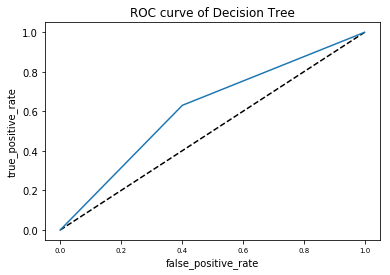

In [141]:
#roc_curve
y_pred_proba_ada = dt.predict_proba(sample_X)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=sample_y, y_score=y_pred_proba_ada)
plt.plot([0,1],[0,1],'k--')
plt.plot(false_positive_rate,true_positive_rate, label='Decision Tree')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.title('ROC curve of Decision Tree' )
plt.show()

### SGD


In [188]:
sgd_pkl_filename = os.path.join(mlobjects+'SGD.pkl')
sgd_pkl = open(sgd_pkl_filename, 'rb')
sgd = pickle.load(sgd_pkl)
print ("Loaded sgd model :: ", sgd)

Loaded sgd model ::  SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [189]:
y_pred_sgd= sgd.predict(X_h5)

In [190]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, y_pred_sgd))

confusion_matrix  [[3365496 1661018]
 [  12102   32339]]


In [191]:
#roc_auc_score
y_pred_proba_sgd = sgd.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_sgd) * 100
print('roc_auc_score ' + str(roc))

roc_auc_score 70.12935508495029


### XGB


In [177]:
xgb_pkl_filename = os.path.join(mlobjects+'xgb.pkl')
xgb_pkl = open(xgb_pkl_filename, 'rb')
xgb = pickle.load(xgb_pkl)
print ("Loaded XGB model :: ", xgb)

Loaded XGB model ::  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=0, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


In [178]:
y_pred_xgb= xgb.predict(X_h5)

In [179]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, y_pred_xgb))

confusion_matrix  [[4483807  542707]
 [  25644   18797]]


In [180]:
#roc_auc_score
y_pred_proba_xgb = xgb.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_xgb) * 100
print('roc_auc_score ' + str(roc))

roc_auc_score 77.40592580569363


In [182]:
for name, importance in zip(X_h5.columns, xgb.feature_importances_):
    print(name, importance)

active_brand 0.004297994
association_type 0.015759312
last_sales_dealer_markettype 0.0
marital_status 0.0
marital_status_confidence 0.0014326648
i1_education_confidence 0.0
home_ownership 0.0028653296
presence_of_children 0.0
creditcard_cd 0.0
gndr_cd 0.0057306592
interest_in_fitness_cd 0.0
interest_in_outdoors_cd 0.0
interest_in_sports_cd 0.0
interest_in_golf_cd 0.0
tennis_cd 0.0
interest_in_skiing_cd 0.0
interest_in_cultural_arts_cd 0.0
cruise_enthusiasts_cd 0.0
interest_in_music_cd 0.0
musical_class_opera_big_bnd_cd 0.0
music_country_cd 0.0
music_christian_cd 0.0
music_oldies_cd 0.0
music_rock_cd 0.0
photography_cd 0.0
interest_in_travel_cd 0.0
dwelling_type 0.0
aged_parent_in_hh 0.0
home_business_ind 0.0
i1_business_owner_flg 0.0
presence_of_automobile_cd 0.0
healthy_living_cd 0.0
investors_cd 0.0
invest_in_mutual_fund_annts_cd 0.0
last_serviced_dealer_markettype 0.0
pma_toy_scion_dealership_markettype 0.0
pma_lexus_dealership_markettype 0.0
owned_lexus_sedan_ind 0.0
owned_lexus_LU

### MLP


In [192]:
mlpc_pkl_filename = os.path.join(mlobjects+'mlpc.pkl')
mlpc_pkl = open(mlpc_pkl_filename, 'rb')
mlpc = pickle.load(mlpc_pkl)
print ("Loaded MLPC model :: ", mlpc)

Loaded MLPC model ::  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [193]:
y_pred_mlpc= mlpc.predict(X_h5)

In [194]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, y_pred_mlpc))

confusion_matrix  [[2932835 2093679]
 [   7499   36942]]


In [196]:
#roc_auc_score
y_pred_proba_mlpc = mlpc.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_mlpc) 
print('roc_auc_score ' + str(roc))

roc_auc_score 0.7741027933284734


### GB


In [197]:
gb_pkl_filename = os.path.join(mlobjects+'mlpc.pkl')
gb_pkl = open(gb_pkl_filename, 'rb')
gb = pickle.load(gb_pkl)
print ("Loaded MLPC model :: ", mlpc)

Loaded MLPC model ::  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [198]:
y_pred_gb= gb.predict(X_h5)

In [199]:
#confusion_matrix

print('confusion_matrix ', confusion_matrix(y_h5, y_pred_gb))

confusion_matrix  [[2932835 2093679]
 [   7499   36942]]


In [200]:
#roc_auc_score
y_pred_proba_gb = mlpc.predict_proba(X_h5)[:,1]
roc= roc_auc_score(y_h5, y_pred_proba_gb) 
print('roc_auc_score ' + str(roc))

roc_auc_score 0.7741027933284734


### H2o

In [202]:
h2o_model = h2o.load_model(mlobjects + 'RM_h2o_classification')

In [ ]:
test_h2o= h2o.H2OFrame(test)

/datascience/home/ssaha/h2o/utils/shared_utils.py:170: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



In [204]:
y_pred_h2o = h2o_model.predict(test_h2o)

ValueError: test_data must be an instance of H2OFrame